# Milestone 2 - Model Training Notebook

In [8]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install tensorflow


In [11]:
import sys
!{sys.executable} -m pip uninstall -y tensorflow
!{sys.executable} -m pip uninstall -y keras


Found existing installation: tensorflow 2.20.0
Uninstalling tensorflow-2.20.0:
  Successfully uninstalled tensorflow-2.20.0
Found existing installation: keras 3.12.0
Uninstalling keras-3.12.0:
  Successfully uninstalled keras-3.12.0


In [12]:
!{sys.executable} -m pip install tensorflow --upgrade


  Using cached tensorflow-2.20.0-cp311-cp311-win_amd64.whl.metadata (4.6 kB)
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
Using cached tensorflow-2.20.0-cp311-cp311-win_amd64.whl (331.8 MB)
Using cached keras-3.12.0-py3-none-any.whl (1.5 MB)

   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   --------

# Milestone 2: Model Training & Evaluation

# Import required libraries

In [18]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [22]:
import os
os.getcwd()


'c:\\Users\\HAI\\OneDrive\\Attachments\\Desktop\\fakejob'

In [25]:
import pandas as pd

df = pd.read_csv(r'c:\Users\HAI\OneDrive\Attachments\Desktop\fakejob\fake_job_postings_cleaned.csv')
df.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,clean_text
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,marketing intern food52 fast growing james bea...
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,customer service cloud video production organi...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,commissioning machinery assistant cma client l...
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,account executive washington dc company esri e...
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,bill review manager job title itemization revi...


#-----------------------------
# 1. Load and preprocess dataset
#-----------------------------
# Example: dataset.csv with 'text' and 'label' columns

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
df = pd.read_csv(r'c:\Users\HAI\OneDrive\Attachments\Desktop\fakejob\fake_job_postings_cleaned.csv')

# Features and target
X = df['clean_text']       # preprocessed text
y = df['fraudulent']       # 0 or 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


Train size: 14304 Test size: 3576


#-----------------------------
# 2. Text Vectorization (TF-IDF for ML models)
#-----------------------------

In [30]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



#-----------------------------
# 3. Baseline ML Models
#-----------------------------

# ----- Logistic Regression -----

In [31]:

lr = LogisticRegression(max_iter=1000)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_tfidf, y_train)
best_lr = grid_lr.best_estimator_

# Predictions
y_pred_lr = best_lr.predict(X_test_tfidf)

# Metrics
print("Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, best_lr.predict_proba(X_test_tfidf)[:,1]))

# Save model
joblib.dump(best_lr, 'logistic_regression_model.pkl')



Logistic Regression Performance
Accuracy: 0.9812639821029083
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.93      0.66      0.77       173

    accuracy                           0.98      3576
   macro avg       0.96      0.83      0.88      3576
weighted avg       0.98      0.98      0.98      3576

Confusion Matrix:
 [[3395    8]
 [  59  114]]
ROC-AUC: 0.9852289462375088


['logistic_regression_model.pkl']

# ----- Random Forest -----

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import joblib

# -----------------------------
# Load dataset
# -----------------------------
df = pd.read_csv('fake_job_postings_cleaned.csv')  # or 'fake_job_postings.csv'
# Features and labels
texts = df['clean_text'].astype(str)
labels = df['fraudulent']
  # adjust column name if needed


# -----------------------------
# Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# -----------------------------
# TF-IDF Vectorization
# -----------------------------
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# -----------------------------
# Random Forest
# -----------------------------
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [100], 'max_depth': [20, None]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_tfidf, y_train)

best_rf = grid_rf.best_estimator_
print("Random Forest Best Hyperparameters:", grid_rf.best_params_)

y_pred_rf = best_rf.predict(X_test_tfidf)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test_tfidf)[:,1]))

# Save model
joblib.dump(best_rf, 'random_forest_model.pkl')
print("Random Forest model saved successfully!")


Random Forest Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}
Random Forest Accuracy: 0.9807046979865772
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       1.00      0.62      0.76       181

    accuracy                           0.98      3576
   macro avg       0.99      0.81      0.88      3576
weighted avg       0.98      0.98      0.98      3576

Confusion Matrix:
 [[3395    0]
 [  69  112]]
ROC-AUC: 0.9756076127551891
Random Forest model saved successfully!


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


#-----------------------------
# 4. Deep Learning Model (BiLSTM)
#-----------------------------

In [5]:
# -----------------------------
# BiLSTM Model for Fake Job Postings
# -----------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# -----------------------------
# Load dataset
# -----------------------------
df = pd.read_csv(r'c:\Users\HAI\OneDrive\Attachments\Desktop\fakejob\fake_job_postings_cleaned.csv')

# Select features and labels
X = df['clean_text']            # Column with cleaned text
y = df['fraudulent']            # Column with 0/1 labels

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Tokenization and padding
# -----------------------------
max_words = 10000
max_len = 200
embedding_dim = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# -----------------------------
# Build BiLSTM model
# -----------------------------
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# -----------------------------
# Train model
# -----------------------------
history = model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[early_stop]
)

# -----------------------------
# Evaluate model
# -----------------------------
loss, acc = model.evaluate(X_test_pad, y_test)
y_pred_dl = (model.predict(X_test_pad) > 0.5).astype(int)

print("BiLSTM Performance")
print("Accuracy:", acc)
print(classification_report(y_test, y_pred_dl))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dl))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_dl))

# -----------------------------
# Save model
# -----------------------------
model.save('bilstm_model.h5')


Epoch 1/10
358/358 [==============================] - 195s 525ms/step - loss: 0.1255 - accuracy: 0.9629 - val_loss: 0.0753 - val_accuracy: 0.9773
Epoch 2/10
358/358 [==============================] - 190s 532ms/step - loss: 0.0395 - accuracy: 0.9863 - val_loss: 0.0785 - val_accuracy: 0.9755
Epoch 3/10
358/358 [==============================] - 183s 511ms/step - loss: 0.0180 - accuracy: 0.9953 - val_loss: 0.0834 - val_accuracy: 0.9787
Epoch 4/10
112/112 [==============================] - 17s 132ms/step
BiLSTM Performance
Accuracy: 0.9776286482810974
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3403
           1       0.83      0.68      0.75       173

    accuracy                           0.98      3576
   macro avg       0.90      0.84      0.87      3576
weighted avg       0.98      0.98      0.98      3576

Confusion Matrix:
 [[3378   25]
 [  55  118]]
ROC-AUC: 0.8373672329243662


C:\Users\HAI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
# -----------------------------
# BiLSTM
# -----------------------------
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

max_words = 10000
max_len = 200
embedding_dim = 100

# Tokenization
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build BiLSTM model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(128)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train BiLSTM
model.fit(X_train_pad, y_train, validation_split=0.2, epochs=5, batch_size=32)

# Predict
y_pred_dl = (model.predict(X_test_pad) > 0.5).astype(int)

Epoch 1/5
358/358 [==============================] - 194s 513ms/step - loss: 0.1273 - accuracy: 0.9644 - val_loss: 0.0629 - val_accuracy: 0.9797
Epoch 2/5
358/358 [==============================] - 186s 519ms/step - loss: 0.0421 - accuracy: 0.9854 - val_loss: 0.0589 - val_accuracy: 0.9836
Epoch 3/5
358/358 [==============================] - 182s 509ms/step - loss: 0.0152 - accuracy: 0.9955 - val_loss: 0.0633 - val_accuracy: 0.9790
Epoch 4/5
358/358 [==============================] - 181s 505ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0764 - val_accuracy: 0.9808
Epoch 5/5
112/112 [==============================] - 20s 154ms/step


#-----------------------------
# 5. Model Comparison
#-----------------------------

In [6]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
df = pd.read_csv('fake_job_postings_cleaned.csv')  # Adjust path as needed
X = df['clean_text']
y = df['fraudulent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF for ML models
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs']}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_tfidf, y_train)
best_lr = grid_lr.best_estimator_

# Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [100], 'max_depth': [20, None]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_tfidf, y_train)
best_rf = grid_rf.best_estimator_

# BiLSTM preprocessing
max_words = 10000
max_len = 200
embedding_dim = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# BiLSTM model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(128)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=32, callbacks=[early_stop])

# Predictions
y_pred_lr = best_lr.predict(X_test_tfidf)
y_pred_rf = best_rf.predict(X_test_tfidf)
y_pred_dl = (model.predict(X_test_pad) > 0.5).astype(int)

def compute_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

# -----------------------------
# Compute metrics for each model
# -----------------------------
metrics_lr = compute_metrics(y_test, y_pred_lr)
metrics_rf = compute_metrics(y_test, y_pred_rf)
metrics_dl = compute_metrics(y_test, y_pred_dl)

# -----------------------------
# Combine into DataFrame for comparison
# -----------------------------
results = pd.DataFrame([metrics_lr, metrics_rf, metrics_dl],
                       index=['Logistic Regression', 'Random Forest', 'BiLSTM'])

print("Model Comparison Metrics:")
print(results)

# -----------------------------
# Optional: Confusion matrices
# -----------------------------
print("\nConfusion Matrix - Logistic Regression:\n", confusion_matrix(y_test, y_pred_lr))
print("\nConfusion Matrix - Random Forest:\n", confusion_matrix(y_test, y_pred_rf))
print("\nConfusion Matrix - BiLSTM:\n", confusion_matrix(y_test, y_pred_dl))


Epoch 1/10
358/358 [==============================] - 198s 525ms/step - loss: 0.1417 - accuracy: 0.9615 - val_loss: 0.0803 - val_accuracy: 0.9734
Epoch 2/10
358/358 [==============================] - 188s 525ms/step - loss: 0.0466 - accuracy: 0.9830 - val_loss: 0.0768 - val_accuracy: 0.9780
Epoch 3/10
358/358 [==============================] - 180s 503ms/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.0975 - val_accuracy: 0.9762
Epoch 4/10
358/358 [==============================] - 195s 546ms/step - loss: 0.0081 - accuracy: 0.9978 - val_loss: 0.0994 - val_accuracy: 0.9762
Epoch 5/10
112/112 [==============================] - 16s 129ms/step
Model Comparison Metrics:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.981264   0.934426  0.658960  0.772881
Random Forest        0.980425   1.000000  0.595376  0.746377
BiLSTM               0.981544   0.879433  0.716763  0.789809

Confusion Matrix - Logistic Regression:
 [[3395    8]
 [  59  114]]

Confusi

#-----------------------------
# 6. Cross-Validation for ML Models
#-----------------------------

In [11]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_lr = cross_val_score(best_lr, X_train_tfidf, y_train, cv=kf, scoring='accuracy')
cv_scores_rf = cross_val_score(best_rf, X_train_tfidf, y_train, cv=kf, scoring='accuracy')

print("Logistic Regression CV Accuracy:", cv_scores_lr.mean(), "+/-", cv_scores_lr.std())
print("Random Forest CV Accuracy:", cv_scores_rf.mean(), "+/-", cv_scores_rf.std())


Logistic Regression CV Accuracy: 0.9800052307007917 +/- 0.0032771713460360698
Random Forest CV Accuracy: 0.9774184291765555 +/- 0.0036469715250328524



🔷 MODEL: Logistic Regression
➡ Accuracy: 0.9740
➡ CV Mean Accuracy: 0.9677 +/- 0.0022

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3403
           1       1.00      0.46      0.63       173

    accuracy                           0.97      3576
   macro avg       0.99      0.73      0.81      3576
weighted avg       0.97      0.97      0.97      3576



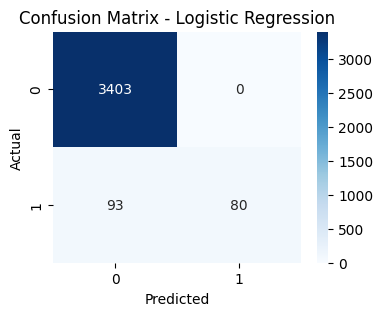

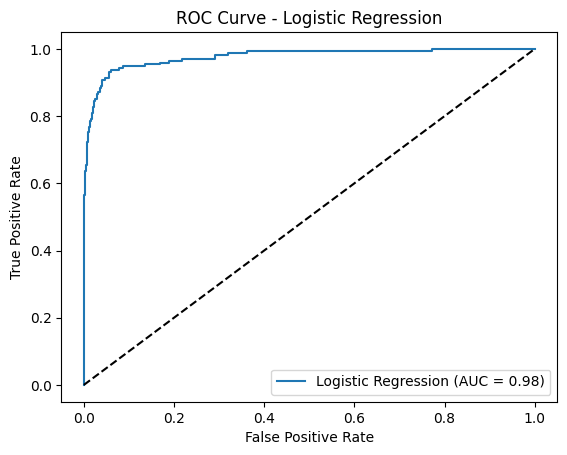

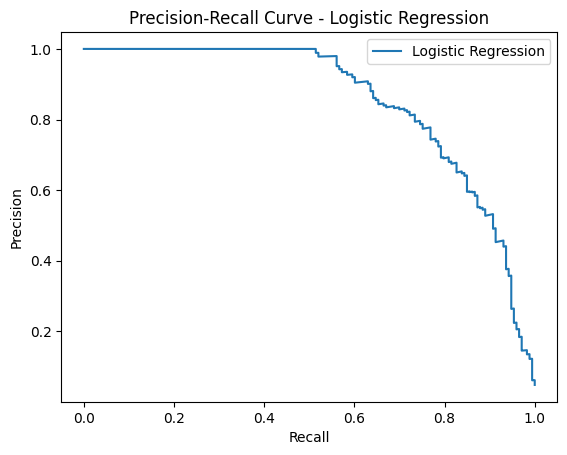


🔷 MODEL: Random Forest
➡ Accuracy: 0.9818


In [ ]:
# 📌 Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             roc_curve, auc, precision_recall_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Features & Target
X = df['clean_text']
y = df['fraudulent']

# 🔄 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 🧠 TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 📌 Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

# 🟩 Train + Evaluate Models
for name, model in models.items():
    print(f"\n🔷 MODEL: {name}")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    y_prob = model.predict_proba(X_test_tfidf)[:, 1]

    # 🧮 Accuracy
    print(f"➡ Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    # 📌 Cross Validation
    cv_scores = cross_val_score(model, tfidf.transform(X), y, cv=5)
    print(f"➡ CV Mean Accuracy: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}")

    # 🧾 Classification Report
    print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))

    # 🔢 Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # 📈 ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.show()

    # 📉 Precision–Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure()
    plt.plot(recall, precision, label=name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f"Precision-Recall Curve - {name}")
    plt.legend()
    plt.show()
